<a href="https://colab.research.google.com/github/yasyamauchi/education/blob/main/2024AIreport2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 人工知能 第1回レポート課題  2,3

**課題1はToyoNet-ACEを見ること！**

# データを読み込む  

* country	国名
* child_mort	出生1000人あたりの5歳未満の子供の死亡数
* exports	人口当たり輸出額/GDP
* health	人口当たり医療費/GDP
* imports	人口当たり輸入額/GDP
* Income	人口当たり収入
* Inflation	経済成長率
* life_expec	平均寿命
* total_fer	平均出生数/女性
* gdpp	人口当たりGDP  

## 1) ファイルCountry-data.csvをToyoNet-ACEからダウンロードして，Google Colabにアップロードする  

手順はToyoNet-ACEの"Google Colabへのファイルのアップロード方法.pdf"を見る．  
アップロードしたデータはGoogle Colabを終了すると消えてしまうので，再度アップロードする必要がある．

##2) 次のコードを実行してデータを読み込む．最初の5行が表示される．

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_df = pd.read_csv('Country-data.csv')
data_df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##3) 次のコードを実行し，全データの組み合わせの散布図を作成する

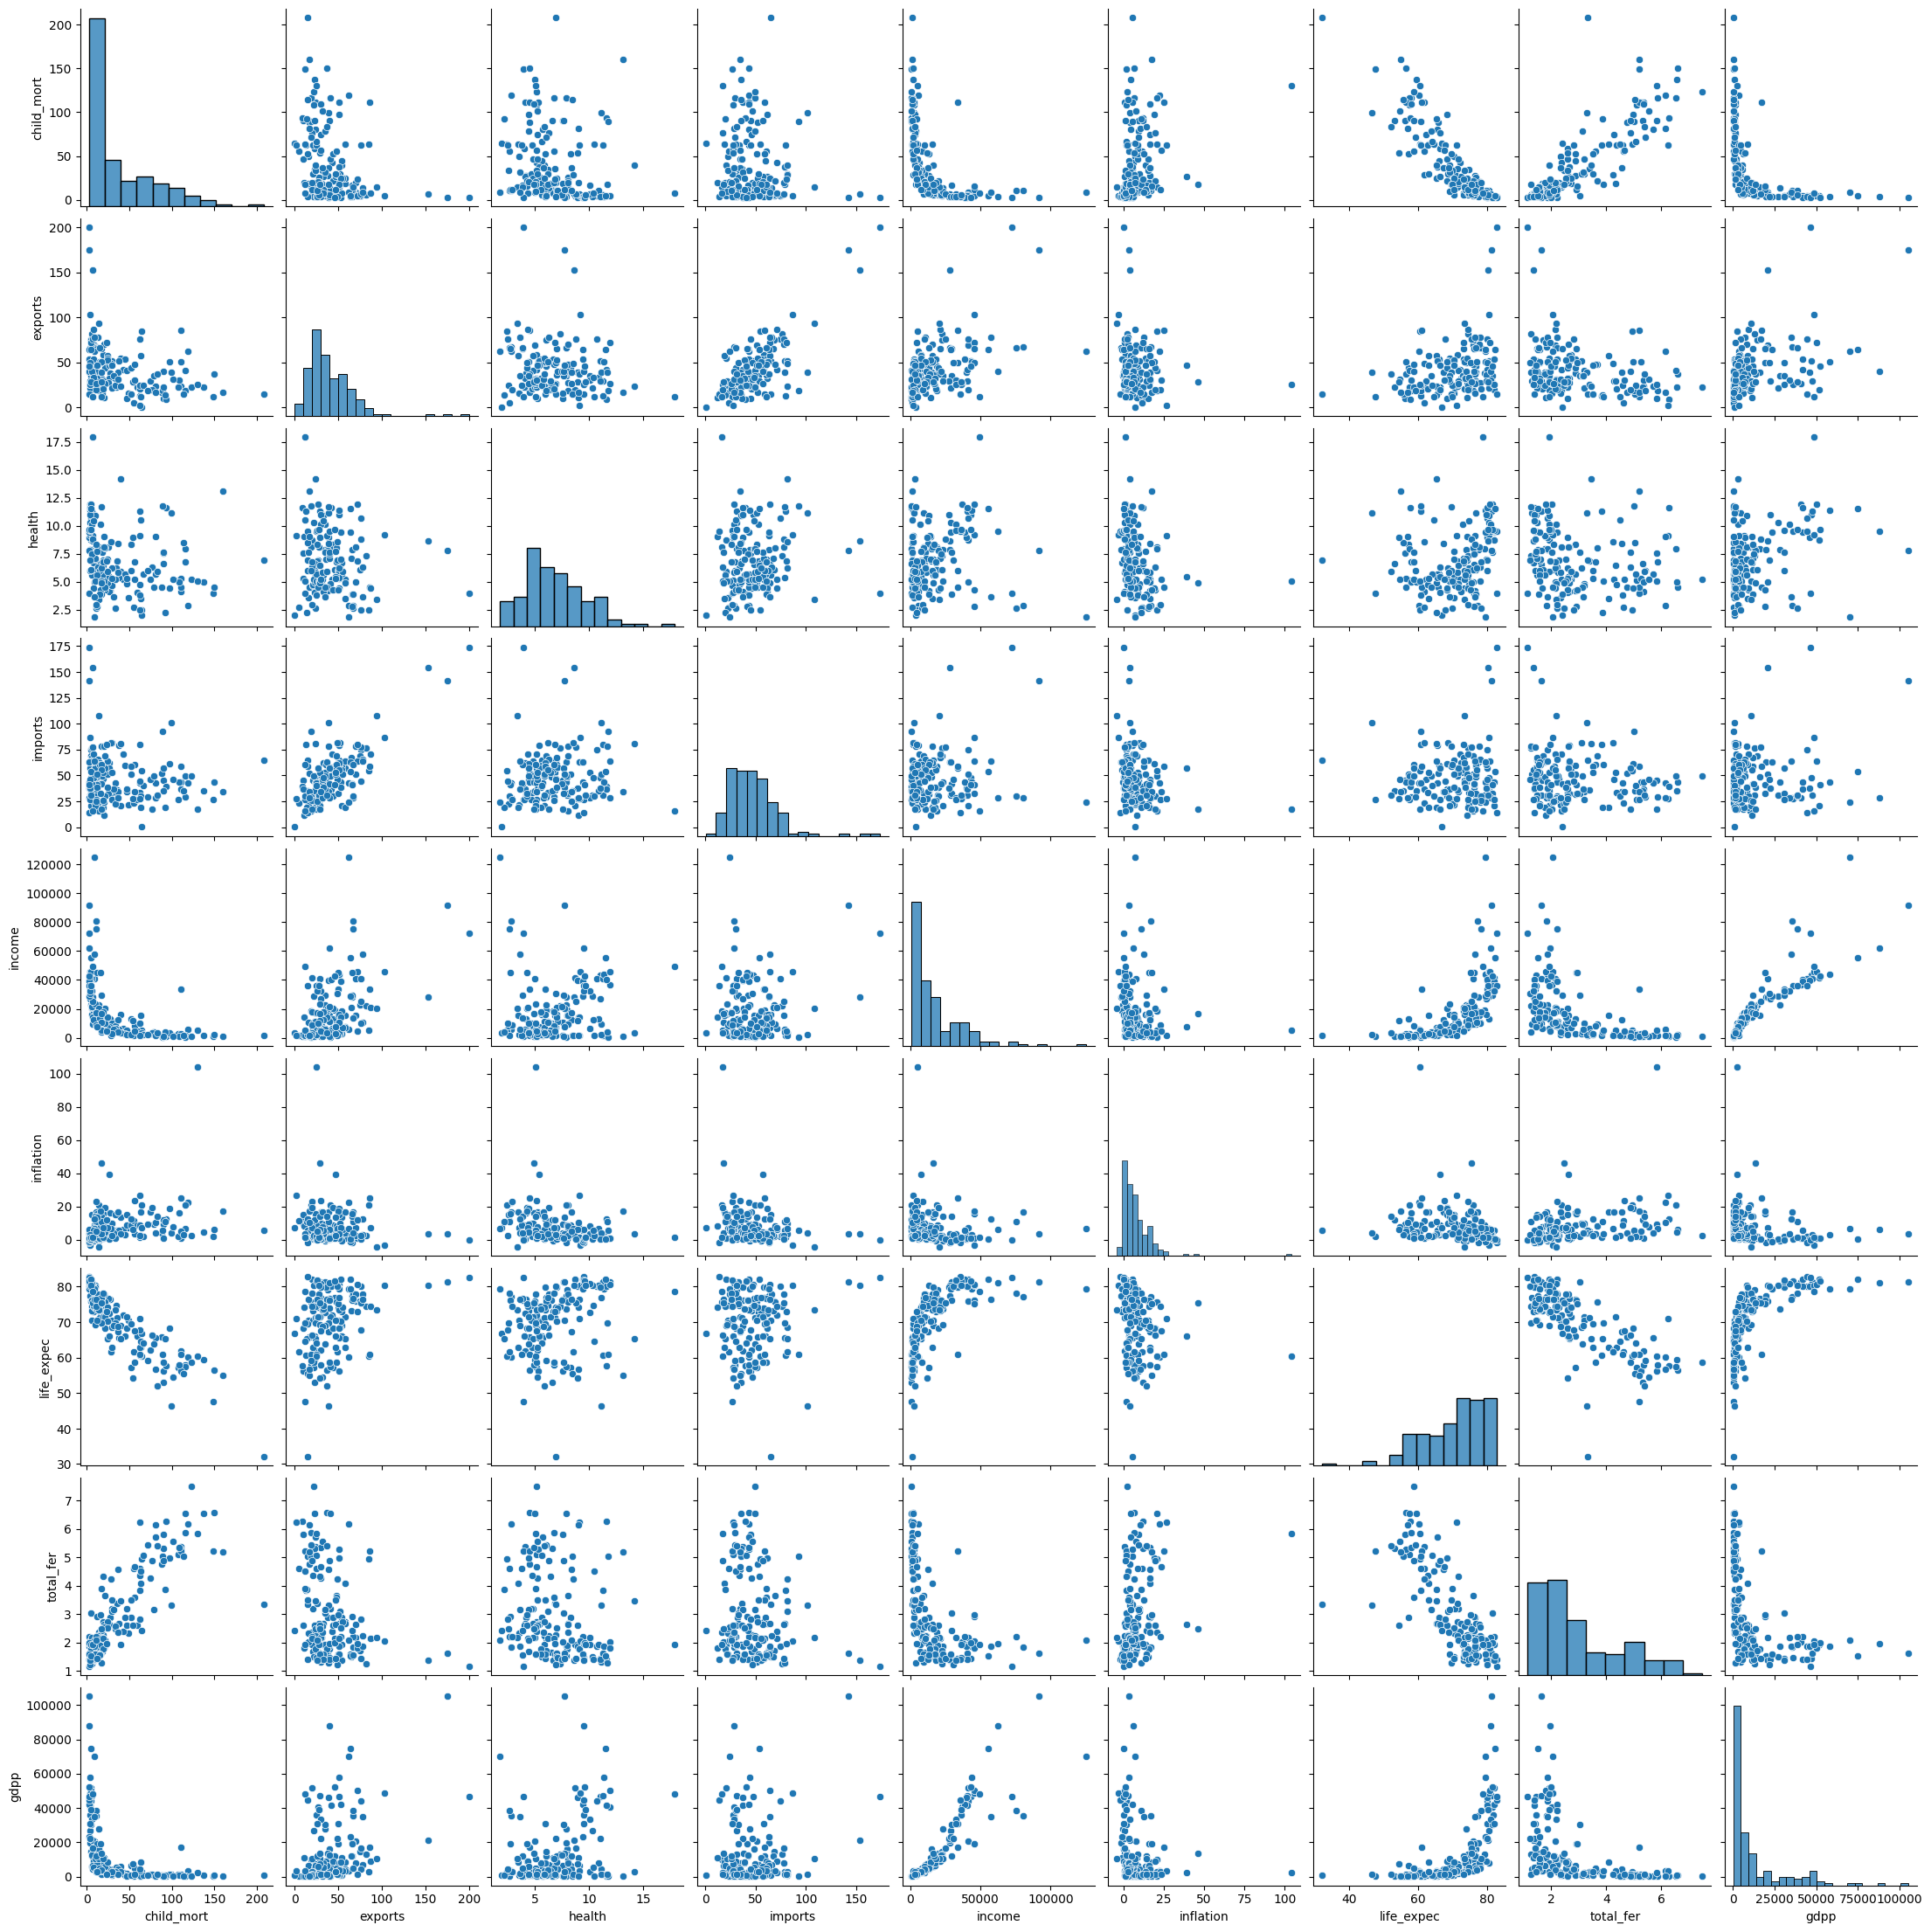

In [2]:
sns.pairplot(data_df)

# 問題２：一次関数による近似

平均寿命を横軸，子供の死亡数を縦軸のグラフを作成する．子供の死亡数が多いほど平均寿命が低くなることを確認する．

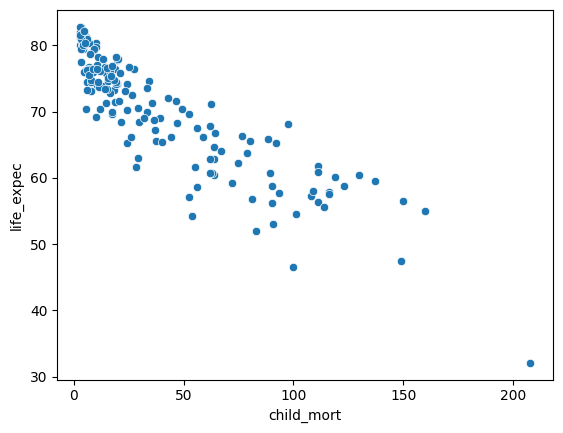

In [3]:
data_df_lc=data_df.loc[:,["child_mort","life_expec"]]
ax = sns.scatterplot(x='child_mort', y='life_expec', data=data_df_lc)

##【課題2-1】一次関数$y=ax+b$で近似する  
次のコードを使用し，aの初期値は-1，bの初期値は60から試して，両方の数字の調整を繰り返して，誤差Jが最も少なくなりそうなaとb，そのときの誤差Jを答えよ．また，そのときのグラフのスクリーンショットをレポートにつけよ．

a= -0.2
b= 80
J=3347.6540000000014


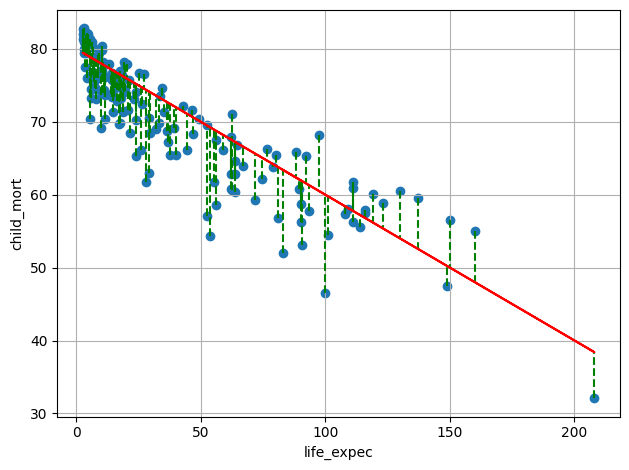

In [6]:
# 1次関数の定義
def estimate_func(param,x):
    return (param[0]*x + param[1])

p = []
p.append(float(input('a= ')))  # 最初は-1あたりから試す
p.append(float(input('b= ')))  # 最初は60あたりから試す

x = data_df['child_mort'].to_list()
y = data_df['life_expec'].to_list()

ylin = [estimate_func(p,i) for i in x]  # y = ax + b

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('life_expec')  # x軸ラベル
axe.set_ylabel('child_mort')  # y軸ラベル
axe.grid()            # 罫線
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

# 問題３：クラスタリング  

## 1) 医療費とGDPのデータだけ取り出して散布図にする  
なおGDPは1万で割る

<ipython-input-7-60ba2871030c>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.0553  0.409   0.446   0.353   1.22    1.03    0.322   5.19    4.69
  0.584   2.8     2.07    0.0758  1.6     0.603   4.44    0.434   0.0758
  0.218   0.198   0.461   0.635   1.12    3.53    0.684   0.0575  0.0231
  0.0786  0.131   4.74    0.331   0.0446  0.0897  1.29    0.456   0.625
  0.0769  0.0334  0.274   0.82    0.122   1.35    3.08    1.98    5.8
  0.545   0.466   0.26    0.299   1.71    0.0482  1.46    0.365   4.62
  4.06    0.875   0.0562  0.296   4.18    0.131   2.69    0.737   0.283
  0.0648  0.0547  0.304   0.0662  1.31    4.19    0.135   0.311   0.653
  0.45    4.87    3.06    3.58    0.468   4.45    0.368   0.907   0.0967
  0.149   3.85    0.088   0.114   1.13    0.886   0.117   0.0327  1.21
  1.2    10.5     0.454   0.0413  0.0459  0.907   0.71    0.0708  2.11
  0.12    0.8     0.286   0.163   0.265   0.668   0.283   0

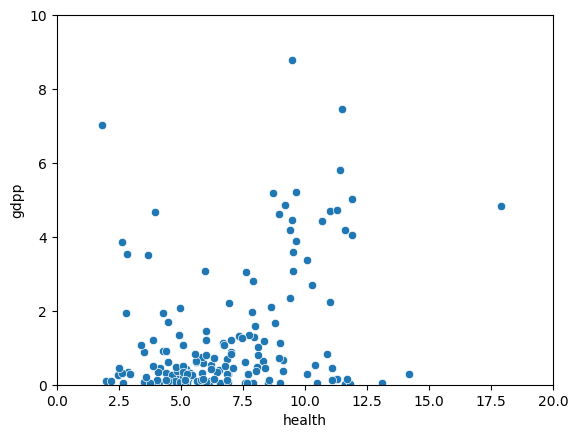

In [7]:
data_df_hg=data_df.loc[:,["health","gdpp"]]
data_df_hg.loc[:,"gdpp"]=data_df_hg.loc[:,"gdpp"].apply(lambda x: x/10000) # 1万で割る（※xとyの桁が乖離しているとK-Meansはうまくいかない）
ax = sns.scatterplot(x='health', y='gdpp', data=data_df_hg)
plt.rcParams["figure.figsize"] = (10, 5)
plt.xlim(0, 20)
plt.ylim(0, 10)
plt.show()

## 2)【課題3-1】クラスター数の決定  
次のK-Means法のコードを実行して得られた図から，クラスターの適切な数を求めよ

横軸はクラスター数，縦軸は損失(各クラスタの中心からデータへの二乗誤差の総和とのこと)となる

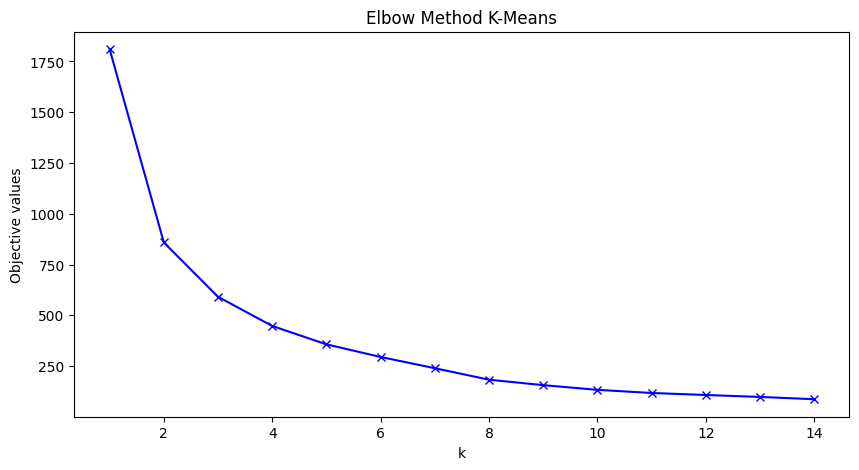

In [8]:
X = data_df_hg.values
from sklearn.cluster import KMeans
objective_vals = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=0)
    km = km.fit(X)
    objective_vals.append(km.inertia_)
plt.plot(K, objective_vals, 'bx-')
plt.xlabel('k')
plt.ylabel('Objective values')
plt.title('Elbow Method K-Means')
plt.show()

## 3)クラスター当たりの国数を表示する  
**クラスター数は？：**のあとに先ほど決めたクラスターの数を入れて実行すること

In [9]:
ncl = int(input('クラスター数は？：'))
pred = KMeans(n_clusters=ncl, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=0).fit_predict(X)
data_df_hgc=data_df_hg
data_df_hgc['cluster']=pred
data_df_hgc['cluster'].value_counts()

クラスター数は？：3


,count
cluster,
1,102
0,45
2,20


## 4)クラスター当たりの医療費支出とGDPの平均を求める

In [10]:
data_df_hgc.groupby('cluster').mean()

,health,gdpp
cluster,,
0,9.231556,0.908460
1,5.016569,0.703242
2,10.555500,5.194500


##5)【課題3-2】クラスターの可視化  
次のコードを実行し，クラスターを図示し，画面キャプチャでレポートに添付すること．

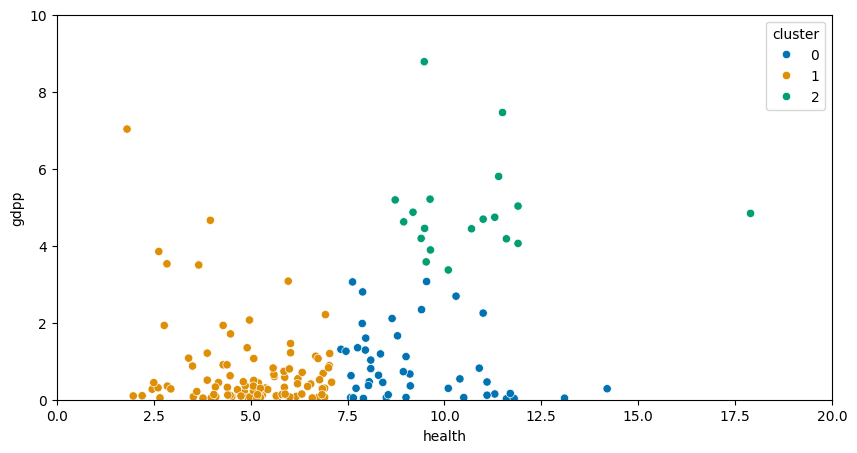

In [11]:
ax = sns.scatterplot(x='health', y='gdpp', hue='cluster',data=data_df_hgc, palette='colorblind')
plt.rcParams["figure.figsize"] = (10, 5)
plt.xlim(0, 20)
plt.ylim(0, 10)
plt.show()

以上